In [1]:
!pip install scikit-learn==0.19

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import KFold,StratifiedKFold

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#!pip install catboost
#!pip install lightgbm

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8b5f588b68da4996baf70e6bd300258a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='flfspTJMXEtoaBARCR_9QgJX49zeoPn_kiF9CPaVl5zp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8b5f588b68da4996baf70e6bd300258a.get_object(Bucket='ibmhackchallenge-donotdelete-pr-o83h6efc5p3t2k',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:

body = client_8b5f588b68da4996baf70e6bd300258a.get_object(Bucket='ibmhackchallenge-donotdelete-pr-o83h6efc5p3t2k',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

center = pd.read_csv(body)
center.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:

body = client_8b5f588b68da4996baf70e6bd300258a.get_object(Bucket='ibmhackchallenge-donotdelete-pr-o83h6efc5p3t2k',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal = pd.read_csv(body)
meal.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


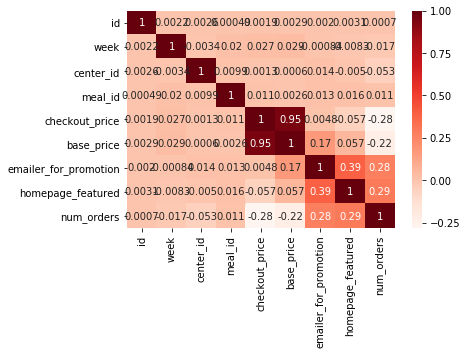

In [9]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["num_orders"])
print(cor_target)

id                       0.000702
week                     0.017210
center_id                0.053035
meal_id                  0.010597
checkout_price           0.282108
base_price               0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
Name: num_orders, dtype: float64


In [11]:
df=df.merge(center,on='center_id',copy=False)
df = df.merge(meal,on='meal_id',copy=False)
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [12]:
print(sorted(df['category'].unique()))
print(df['cuisine'].nunique())
print(df['center_type'].nunique())

['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish', 'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters']
4
3


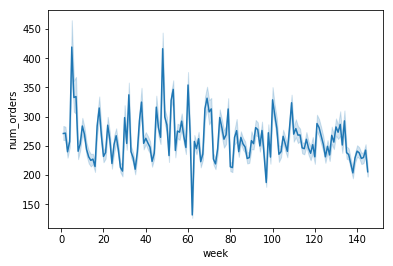

In [13]:
sns.lineplot(df['week'],df['num_orders'])

In [14]:
print(df.week.value_counts()[1])

2922


In [15]:
print(df)
df.columns

             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
5       1493612     6         55     1885          146.53      146.53   
6       1110832     7         55     1885          145.53      146.53   
7       1461167     8         55     1885          146.53      145.53   
8       1102364     9         55     1885          134.83      134.83   
9       1018130    10         55     1885          144.56      143.56   
10      1047565    11         55     1885          146.53      144.53   
11      1282497    12         55     1885          145.53      146.53   
12      1136216    13         55     1885          

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

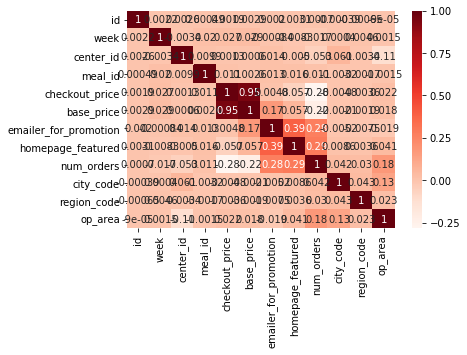

In [16]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
cor_target = abs(cor["num_orders"])
print(cor_target)

id                       0.000702
week                     0.017210
center_id                0.053035
meal_id                  0.010597
checkout_price           0.282108
base_price               0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
Name: num_orders, dtype: float64


In [18]:
df.city_code.nunique()
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [19]:
print(df.cuisine.unique())

['Thai' 'Indian' 'Italian' 'Continental']


In [20]:
df.loc[df[df['checkout_price'] > df['base_price']].index,'Discount'] = 1
df.loc[df[df['checkout_price'] < df['base_price']].index,'Discount'] = -1
df.loc[df[df['checkout_price'] == df['base_price']].index,'Discount'] = 0

In [21]:
df['year'] = df['week'].apply(lambda x: int(x/52))
df['month'] = df['week'].apply(lambda x: int(x/4))

In [22]:
le = LabelEncoder()
df['cuisine'] = le.fit_transform(df['cuisine'])
df.rename({0:'Continental',1:'Indian',2:'Italian',3:'Thai'},axis=1,inplace=True)
df['center_type'] = le.fit_transform(df['center_type'])
df.rename({0:'Type_A',1:'Type_B',2:'Type_C'},axis=1,inplace=True)
df['category'] = le.fit_transform(df['category'])
enc = OneHotEncoder(handle_unknown='ignore')
cuisine_df = pd.DataFrame(enc.fit_transform(df[['cuisine','center_type','category']]).toarray())
df = df.join(cuisine_df)

In [23]:
df.drop(['center_type','cuisine','id','category'],axis=1,inplace=True)

In [24]:
df

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,11,12,13,14,15,16,17,18,19,20
0,1,55,1885,136.83,152.29,0,0,177,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,55,1885,135.83,152.29,0,0,323,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,55,1885,132.92,133.92,0,0,96,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,55,1885,135.86,134.86,0,0,163,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,55,1885,146.50,147.50,0,0,215,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,55,1885,146.53,146.53,0,0,285,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,55,1885,145.53,146.53,0,0,148,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,55,1885,146.53,145.53,0,0,135,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,55,1885,134.83,134.83,0,0,175,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,55,1885,144.56,143.56,0,0,175,647,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
print(df.columns)
print(df.shape)

Index([                 'week',             'center_id',
                     'meal_id',        'checkout_price',
                  'base_price', 'emailer_for_promotion',
           'homepage_featured',            'num_orders',
                   'city_code',           'region_code',
                     'op_area',              'Discount',
                        'year',                 'month',
                             0,                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12,                      13,
                            14,                      15,
                            16,                      17,
                            18,                      19,
                            20]

In [26]:
'''df['center_id'] = df['center_id'].astype(np.object)
df['meal_id'] = df['meal_id'].astype(np.object)
df['city_code'] = df['city_code'].astype(np.object)
df['region_code'] = df['region_code'].astype(np.object)'''

"df['center_id'] = df['center_id'].astype(np.object)\ndf['meal_id'] = df['meal_id'].astype(np.object)\ndf['city_code'] = df['city_code'].astype(np.object)\ndf['region_code'] = df['region_code'].astype(np.object)"

In [27]:
df.columns

Index([                 'week',             'center_id',
                     'meal_id',        'checkout_price',
                  'base_price', 'emailer_for_promotion',
           'homepage_featured',            'num_orders',
                   'city_code',           'region_code',
                     'op_area',              'Discount',
                        'year',                 'month',
                             0,                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12,                      13,
                            14,                      15,
                            16,                      17,
                            18,                      19,
                            20]

In [34]:
X = df.drop(['num_orders'],axis=1)
y = df[['num_orders']]

In [35]:
X_new = X.as_matrix()
y_new = y.as_matrix()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, y_new, test_size=0.3, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(type(y_train))


Train set: (319583, 34) (319583, 1)
Test set: (136965, 34) (136965, 1)
<class 'numpy.ndarray'>


In [37]:
X_train.columns
X_test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [38]:
xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))
print(y_train)

Train Score : 0.9599692248264103
Test Score : 0.8791026726370216
Explained Variance : 0.8631230531350698
RMSLE : 137.8753077843899
[[ 14]
 [135]
 [150]
 ...
 [215]
 [472]
 [162]]


In [45]:
xgb.predict([149,19,1993,5000,9000,1,0,800,90,3.5,-1,1,12,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])

array([295.6234], dtype=float32)

In [ ]:
X_train.columns

In [ ]:
model2 = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.02, 
    max_depth=8, 
    l2_leaf_reg=10, 
    loss_function='RMSE',
    random_seed=2019,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    use_best_model=True
    )

In [ ]:
'''errcb=[]
y_pred_test=[]

fold = KFold(n_splits=5,shuffle=True,random_state=2019)

for train_index, test_index in fold.split(df[features],df['num_orders']):
    X_train, X_valid =df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_valid = df['num_orders'][train_index],df['num_orders'][test_index]
    model2.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set=(X_valid,y_valid),
              early_stopping_rounds=300,
              verbose=100)
    preds = model2.predict(X_valid)
    print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))'''


In [ ]:
import pickle
saved_model=pickle.dumps(model2)
model2.save_model("model.h5")

In [ ]:
final_model = pickle.loads(saved_model)

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials={
 
  "apikey": "M8HUBLcBuYVpMu8PXy6tv-hliJDGs_L7ZLqSx287s81-",
  "iam_apikey_description": "Auto-generated for key 71159f14-b33a-4070-9b9f-22d24b6a4b67",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fddcd17aab2246cfb97bd4ba95313be6::serviceid:ServiceId-2822b76c-9727-461c-8cb6-044bd8ca03a0",
  "instance_id": "af8071c8-7598-4276-972e-c342e51de814",
  "url": "https://us-south.ml.cloud.ibm.com"

}


In [ ]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [ ]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Likitha T", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "17131a12a7@gvpce.ac.in", 
               client.repository.ModelMetaNames.NAME: "Warehouse"}

In [ ]:
model_artifact =client.repository.store_model(xgb, meta_props=model_props)

In [ ]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

In [ ]:
deployment = client.deployments.create(published_model_uid, name="Final Deployment")

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

In [ ]:
X_train.columns

In [ ]:
xgb.predict([146,11,1885,1000,900,1,0,656,85,3.5,-1,1,12,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])